# 1. Import data and libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [121]:
# Import ".json" file for the U.S. 

country_geo = '/Users/brooks/Downloads/6/6.1/World Happiness Data/02 Data/Original Data/custom.geo.json'


In [16]:
#folder shortcut
path = r'/Users/brooks/Downloads/6/6.1/World Happiness Data/02 Data/Prepared Data'


In [18]:
#current dir
cwd = os.getcwd()
cwd

'/Users/brooks'

In [27]:
# Join path Happiness_data_final.csv
df = pd.read_csv(os.path.join(path,'Happiness_data_final.csv'), index_col = False)

In [28]:
df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Lower Confidence Interval,Upper Confidence Interval,Standard error of Happiness score
0,152,Afghanistan,Southern Asia,153,3.575,0.030840,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,2015,3.288000,3.432000,0.031311
1,469,Afghanistan,Southern Asia,154,3.360,0.032983,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2016,3.288000,3.432000,0.031311
2,608,Afghanistan,Southern Asia,141,3.794,0.035127,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2017,3.714338,3.873661,0.031311
3,761,Afghanistan,Southern Asia,145,3.632,0.037270,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,2018,3.311402,3.458531,0.031311
4,919,Afghanistan,Southern Asia,154,3.203,0.039413,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,2019,2.908466,3.043401,0.031311


In [43]:
df.shape

(1470, 16)

In [45]:
pd. DataFrame(df_hap)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Standard error of Happiness score
0,Afghanistan,Southern Asia,153,3.5750,0.030840,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015,0.031311
1,Afghanistan,Southern Asia,154,3.3600,0.032983,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016,0.031311
2,Afghanistan,Southern Asia,141,3.7940,0.035127,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017,0.031311
3,Afghanistan,Southern Asia,145,3.6320,0.037270,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018,0.031311
4,Afghanistan,Southern Asia,154,3.2030,0.039413,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019,0.031311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Zimbabwe,Sub-Saharan Africa,146,3.6630,0.042900,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000,2019,0.063721
1466,Zimbabwe,Sub-Saharan Africa,151,3.2992,0.042900,7.865712,0.763093,55.617260,0.711458,0.810237,-0.072064,2020,0.058674
1467,Zimbabwe,Sub-Saharan Africa,148,3.1450,0.042900,7.943000,0.750000,56.201000,0.677000,0.821000,-0.047000,2021,0.058000
1468,Zimbabwe,Sub-Saharan Africa,144,2.9950,0.042900,7.792000,0.720000,55.125500,0.665500,0.793500,-0.046500,2022,0.059500


# 2. Data wrangling

# Fix dummy columns

In [46]:
# create subset by dropping the column Unnamed:0 and the columns Lower & Upper Confidence Interval since they are not relevant for the relationship analysis.
df_hap = df.drop(columns = ['Unnamed: 0', 'Lower Confidence Interval', 'Upper Confidence Interval'])

In [47]:
df_hap.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Standard error of Happiness score
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,76.325850,5.448368,0.047080,4.089385,0.969487,24.671361,0.555297,0.352562,0.138323,2018.418367,0.058835
std,44.343336,1.122521,0.014077,4.191500,0.292215,31.376082,0.229495,0.321203,0.171428,2.684411,0.018970
min,1.000000,1.859000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,2015.000000,0.025902
25%,38.000000,4.603500,0.038560,0.838585,0.793857,0.604693,0.392778,0.078000,0.032000,2016.000000,0.045728
50%,76.000000,5.458500,0.044401,1.286006,0.922906,0.832381,0.546040,0.179180,0.145505,2018.000000,0.055655
75%,114.000000,6.269000,0.050921,8.983500,1.185898,63.374625,0.750750,0.721000,0.243250,2021.000000,0.066772
max,158.000000,7.842000,0.136930,11.660000,1.644000,76.953000,0.974998,0.939000,0.838075,2023.000000,0.173000


In [56]:
# Create a subset

df_hap.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year', 'Standard error of Happiness score'],
      dtype='object')

In [60]:
df_hap.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Standard error of Happiness score
0,Afghanistan,Southern Asia,153,3.575,0.030840,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,2015,0.031311
1,Afghanistan,Southern Asia,154,3.360,0.032983,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2016,0.031311
2,Afghanistan,Southern Asia,141,3.794,0.035127,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2017,0.031311
3,Afghanistan,Southern Asia,145,3.632,0.037270,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,2018,0.031311
4,Afghanistan,Southern Asia,154,3.203,0.039413,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,2019,0.031311


In [62]:
type(df_hap)

pandas.core.frame.DataFrame

# 3. Conduct consistency checks

In [64]:
# Check for missing values

df_hap.isnull().sum()

Country                              0
Region                               0
Happiness Rank                       0
Happiness Score                      0
Standard Error                       0
Economy (GDP per Capita)             0
Social Support                       0
Health (Life Expectancy)             0
Freedom                              0
Trust (Government Corruption)        0
Generosity                           0
Year                                 0
Standard error of Happiness score    0
dtype: int64

# Duplicates check

In [66]:
dups = df_hap.duplicated()

In [68]:
dups.shape # no dups

(1470,)

# Extreme values checks

<Axes: xlabel='Happiness Score', ylabel='Count'>

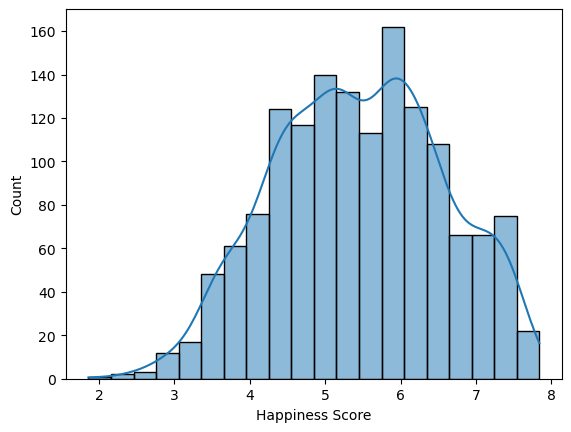

In [71]:
sns.histplot(df_hap['Happiness Score'], bins=20, kde = True) # shows extreme values for 'Happiness Score'

In [73]:
# Check how many extreme values

df_hap[df_hap['Happiness Score'] >1000]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Standard error of Happiness score


In [76]:
# Clean extreme values

df_hap = df_hap[df_hap['Happiness Score'] < 500] 


In [78]:
df_hap.shape

(1470, 13)

In [80]:
# Create a 'Social Support' column

df_hap['Social Support'] = df_hap['Social Support']*4

<Axes: xlabel='Social Support', ylabel='Count'>

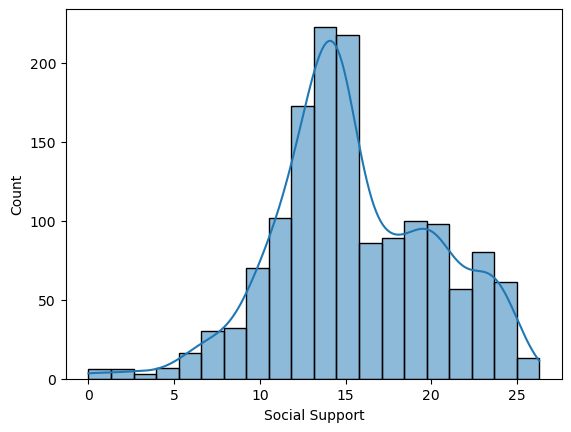

In [82]:
sns.histplot(df_hap['Social Support'], bins=20, kde = True)  # shows extreme values for 'Social Support'

In [84]:
# Clean extreme values in 'Social Support'

df_hap = df_hap[df_hap['Social Support'] < 8000]

<Axes: xlabel='Health (Life Expectancy)', ylabel='Count'>

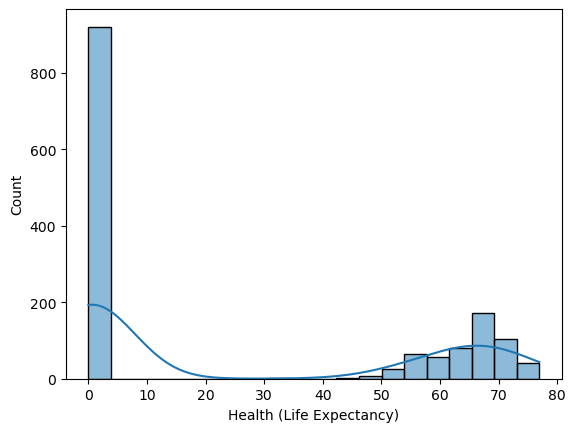

In [87]:
# Check the Health (Life Expectancy) variable

sns.histplot(df_hap['Health (Life Expectancy)'], bins=20, kde = True)

In [89]:
# Select only entries with a non-zero Health (Life Expectancy)

df_hap = df_hap[df_hap['Health (Life Expectancy)'] >= 1]

In [91]:
df_hap.dtypes

Country                               object
Region                                object
Happiness Rank                         int64
Happiness Score                      float64
Standard Error                       float64
Economy (GDP per Capita)             float64
Social Support                       float64
Health (Life Expectancy)             float64
Freedom                              float64
Trust (Government Corruption)        float64
Generosity                           float64
Year                                   int64
Standard error of Happiness score    float64
dtype: object

# 4. Plotting a choropleth

In [94]:
# Create a data frame with just the Country and the values for 'Health (Life Expectancy) we want plotted

data_to_plot = df_hap[['Country','Health (Life Expectancy)']]
data_to_plot.head()

,Country,Health (Life Expectancy)
5,Afghanistan,52.590000
6,Afghanistan,52.493000
7,Afghanistan,53.602500
8,Afghanistan,54.712000
15,Albania,68.708138


In [129]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and World Happiness Data.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['Country', 'Health (Life Expectancy)'],
    key_on = 'feature.properties.name', # this part is very important - check your World Happiness file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Health (Life Expectancy)").add_to(map)
folium.LayerControl().add_to(map)


In [130]:
map.save('plot_data.html')

# Observations
Happiness Score ranges between 4-6.5 showing that Happiness is high within these count
Social support ranges between 10- 15
Health Life Expectancy as a high at 0 meaning there is no high life expectancy